## Import Libraries

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import requests
import nltk
import base64
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephrosas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

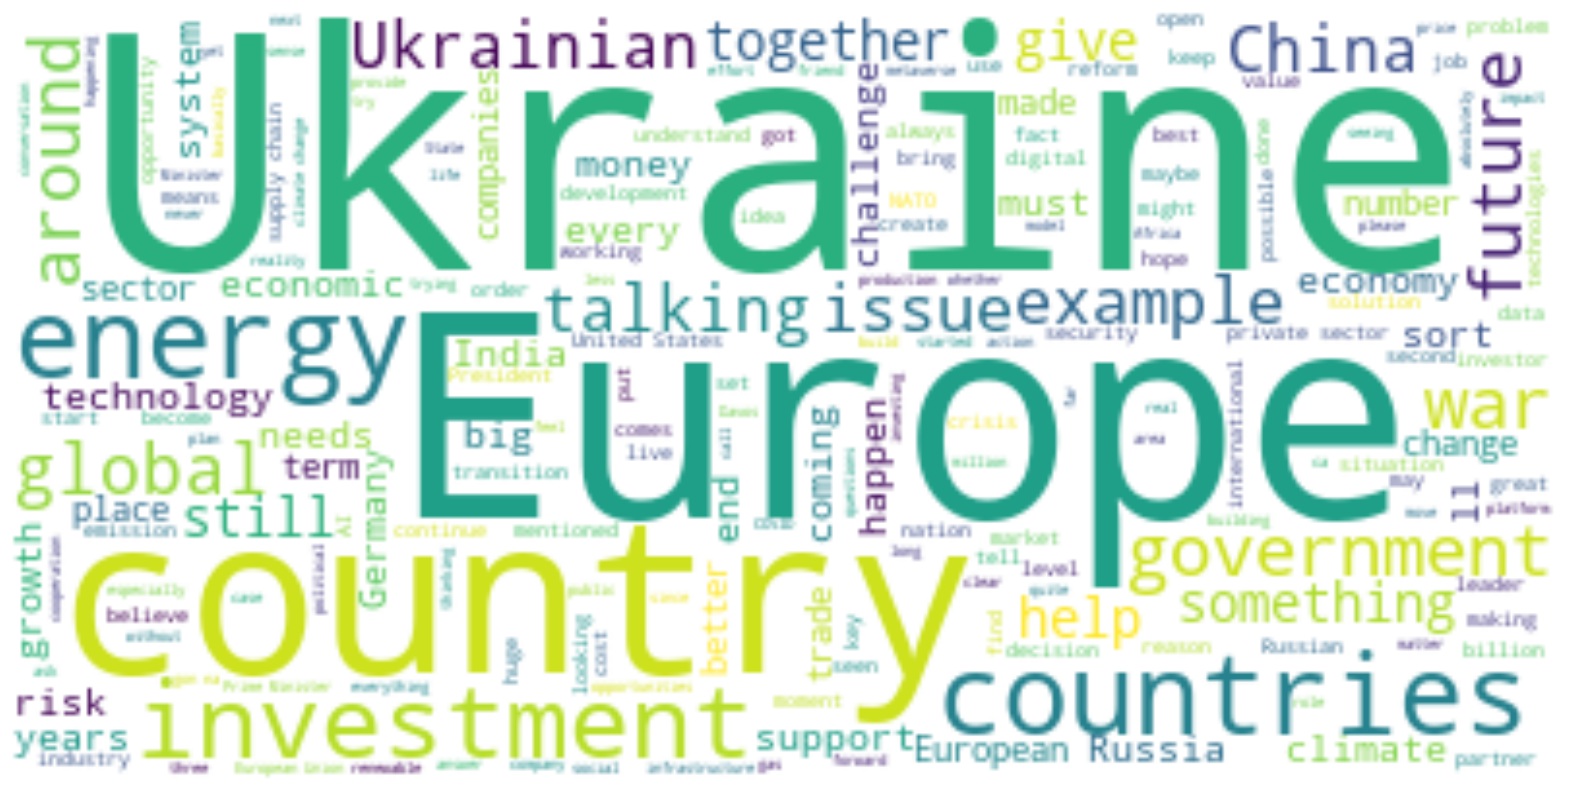

In [8]:
# load the text file
url = 'https://raw.githubusercontent.com/UngaTheGreat/world-economic-forum-nlp/main/data/combined.txt' 
req = requests.get(url)
text = req.text

# tokenize the text
tokens = nltk.word_tokenize(text)

# remove the stopwords
filtered_words = [word for word in tokens if word.lower() not in stopwords.words("english")]

# join the filtered words
filtered_text = " ".join(filtered_words)

# remove common words
remove_words = {'think', 'and', 'that', 
                'the', 'a', 'i', 'know', 
                'that', 'also', 'need', 
                'in', 'of', 'it', 
                'is', 'you', 'world', 
                'people', 'u', 'want', 
                'time', 'this', 'for', 
                'to', 'So', 'but', 
                'us', 'like', 'thing', 
                'well', 'with', 'on', 
                'as', 'we', 'our', 
                'going', 'there', 'mean', 
                'right', 'have', 'are', 
                'what', 'all', 'was', 
                "we're", 'really', 'would', 
                'see', 'be', 'because', 
                'do', 'not', 'now', 
                'say', 'lot', 'get', 
                'will', 'can', 'if', 
                'just', 'about', 'work', 
                'Thank', 'way', 'they', 
                'from', 'at', 'or', 
                'how', 'much', 'new', 
                'more', 'when', 'your', 
                'which', 'by', 'very', 
                'has', 'an', 'some', "don't", 
                'these', 'where', 'been', 
                'here', "I'm", 'look', 
                'important', 'good', 'question', 
                'course', 'things', 'make', 
                'said', 'actually', 'then', 
                'who', 'those', 'other', 
                'kind', 'my', 'let', 
                'even', 'able', 'okay', 
                'two', 'another','year', 
                'one', 'me', 'were', 
                'only', 'first', 'should', 
                'no', 'them', 'their', 
                'many', 'take', 'up', 
                'out', 'today', 'come', 
                'being', 'point', 'why', 
                'part', 'had', 'into', 'last', 
                'go', 'back', "you're", 'doing', 
                'could', 'most', 'talk', 'business', 
                "we've", 'day', 'Yeah', 
                'he', 'Yes', 'already', 
                'different', 'over', 'any', 'sure', 'S', 've', 're', 'm', "n't"}

# create the word cloud
wordcloud = WordCloud(background_color="white", stopwords=remove_words).generate(filtered_text)

# Show the word cloud
plt.figure(figsize=(20, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq = {
    k: v
    for k, v in sorted(
        text_dictionary.items(), reverse=True, key=lambda item: item[1])
}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print(list(word_freq.items())[:50])
print(list(rel_freq.items())[:5])